In [1]:
options(jupyter.plot_mimetypes = 'image/png')
set.seed(1234)

In [2]:
observed <- rbinom(100,1,.7) 

In [3]:
likelihood <- function(p, obs=observed, log=TRUE){
    N <- length(obs)
    x <- sum(obs)
    le <- (factorial(N) / (factorial(x) * factorial(N-x))) * (p)**x * (1-p)**(N-x)
    if(log){
        le <- log(le)
    }
    le
}

In [4]:
likelihood(.8, log=T)

[1] -2.466287

In [5]:
p_test <- seq(from=0.01, to=.99, by=.01)

In [6]:
likelihood_estimate <- sapply(p_test, likelihood, observed)
MLE <-  p_test[which(likelihood_estimate == max(likelihood_estimate))]

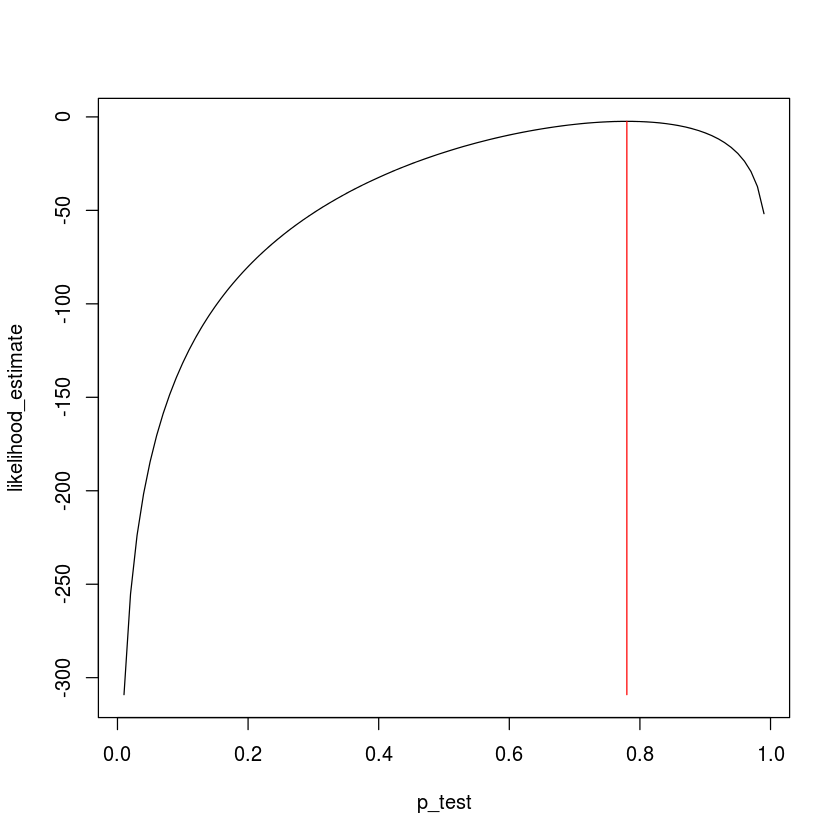

In [7]:
plot(p_test, likelihood_estimate, type="l")
lines(c(MLE, MLE), c(min(likelihood_estimate), max(likelihood_estimate)), col="red")

In [13]:
# Prior distribution
prior <- function(p, log=TRUE){
    dnorm(p, .5, .03, log=log)
}

In [17]:
posterior <- function(p){
   return (likelihood(p) + prior(p))
}

In [19]:
######## Metropolis algorithm ################
 
proposalfunction <- function(p){
    return(rnorm(3,mean = p, sd= c(0.1,0.5,0.3)))
}
 
run_metropolis_MCMC <- function(startvalue, iterations){
    chain = array(dim = c(iterations+1,3))
    chain[1,] = startvalue
    for (i in 1:iterations){
        proposal = proposalfunction(chain[i,])
         
        probab = exp(posterior(proposal) - posterior(chain[i,]))
        if (runif(1) < probab){
            chain[i+1,] = proposal
        }else{
            chain[i+1,] = chain[i,]
        }
    }
    return(chain)
}
 
startvalue = c(4,0,10)
chain = run_metropolis_MCMC(startvalue, 10000)
 
burnIn = 5000
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))

Warning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the first element will be usedWarning message:
In if (runif(1) < probab) {: the condition has length > 1 and only the 